In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL.Image as Image
import cv2
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split as tts

In [11]:
label=[]
with open("/content/cifar_dataset_labels.txt",'r') as f:
  label=f.read().splitlines()
label[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
Image_shape = (224, 224)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")(x), input_shape=Image_shape + (3,)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
img=Image.open("/content/goldfish.jpg").resize((224,224))
img=np.array(img)/255
img.shape

(224, 224, 3)

In [14]:
img[np.newaxis,...].shape

(1, 224, 224, 3)

In [15]:
y_pre=model.predict(img[np.newaxis,...])
y_pre=np.argmax(y_pre)
y_pre

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


2

In [16]:
label[y_pre]

'goldfish'

# **Now work with the flowers dataset**

In [4]:
d_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
d_dir=tf.keras.utils.get_file("flower_photos",origin=d_url,cache_dir="/content/sample_data",untar=True)
d_dir

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


'/content/sample_data/datasets/flower_photos'

In [5]:
import pathlib
d_dir=pathlib.Path(d_dir)
d_dir

PosixPath('/content/sample_data/datasets/flower_photos')

In [6]:
list(d_dir.glob("**/*.jpg"))[:5]

[PosixPath('/content/sample_data/datasets/flower_photos/tulips/15275504998_ca9eb82998.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/tulips/2322670828_34115a7050.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/tulips/13976206001_fd1c2cbd60.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/tulips/251811158_75fa3034ff.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/tulips/5665080897_0796f726c9_m.jpg')]

In [7]:
flower={
    "roses":list(d_dir.glob('roses/*')),
    "daisy":list(d_dir.glob('daisy/*')),
    "dandelion":list(d_dir.glob('dandelion/*')),
    "sunflowers":list(d_dir.glob('sunflowers/*')),
    "tulips":list(d_dir.glob('tulips/*')),
}

In [8]:
label_dict={
    "roses":0,
    "daisy":0,
    "dandelion":0,
    "sunflowers":0,
    "tulips":0,
}

In [9]:
x=[]
y=[]
for i,j in flower.items():
  for img in j:
    img=cv2.imread(str(img))
    img=cv2.resize(img,(224,224))
    x.append(img)
    y.append(label_dict[i])

In [10]:
len(x),len(y)

(3670, 3670)

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0,shuffle=True)

In [13]:
x_train=x_train/255
x_test=x_test/255

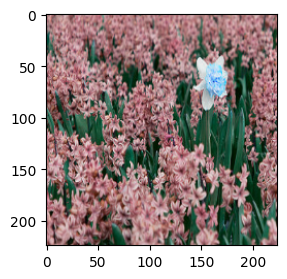

In [14]:
plt.figure(figsize=(3,3))
plt.imshow(x_train[8])

In [28]:
pre=model.predict(np.array([x[0]]))
pre=np.argmax(pre)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [29]:
label[pre]

'maze'

# the above prediction is wrong because the labels that we have is not in the tansefer model so we have to use the weigths not the last layers so here we can just change the last layer




In [21]:
feature_extractor_layer = hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4', input_shape=(224, 224, 3))


In [26]:
from tensorflow.keras import models

In [27]:
model2 =models.Sequential([
    feature_extractor_layer,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')  # Replace `num_classes` with your actual number of classes
])


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x785834348f10> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)